# Laboratorio 2

## Mineria de Datos - Seccion 20

### Grupo 3: Andrés de la Roca y Jun Woo Lee

In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.data', names=['id', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'])

## Limpieza de variables

In [3]:
data

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


#### Limpieza de columna bare_nuclei

In [4]:
# Se limpia la columna bare_nuclei, ya que los valores son string en lugar de int y tiene valores '?'
bare_nucleiArray = []
for item in data['bare_nuclei']:
    if item == '?':
        bare_nucleiArray.append(None)
    else:
        bare_nucleiArray.append(int(item))

data['bare_nuclei'] = bare_nucleiArray

data['bare_nuclei']        



0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
       ... 
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: bare_nuclei, Length: 699, dtype: float64

In [5]:
nan_count = data.isnull().sum()

nan_count #Visualizacion de cuantos valores null hay en la data

id                              0
clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

#### Limpieza de valores unicos segun id

In [6]:
data.nunique() #Visualizacion de valores unicos en la data

#NOTA: el id por defecto deberia de ser 699 valores unicos, al tener solo 645
#se infiere que hay valores duplicados que se deben de limpiar para obtener
#datos mas precisos y sin sesgo.

id                             645
clump_thickness                 10
uniformity_cell_size            10
uniformity_cell_shape           10
marginal_adhesion               10
single_epithelial_cell_size     10
bare_nuclei                     10
bland_chromatin                 10
normal_nucleoli                 10
mitoses                          9
class                            2
dtype: int64

In [7]:
#Eliminacion de filas duplicadas segun el id.

data = data.drop_duplicates(subset=['id'], keep='first')


In [8]:
data.shape #Comprobacion del cambio de forma del dataframe

(645, 11)

#### Reemplazar valores faltantes

<AxesSubplot: >

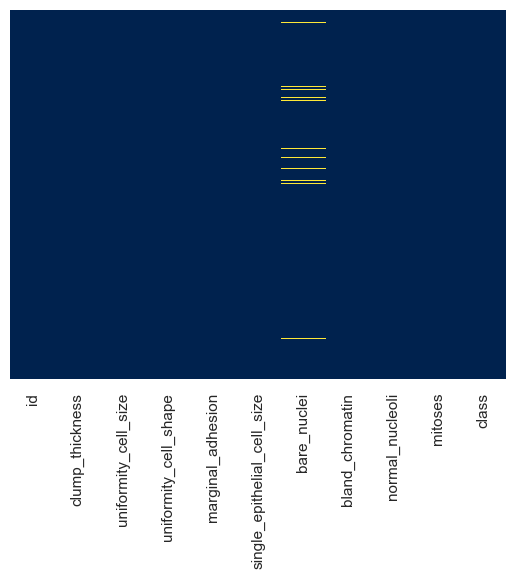

In [9]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap='cividis')

In [10]:
data = clean(data, columns="bare_nuclei", method="fillmissing")

In [11]:
#Convert bare_nuclei column's values from float to int
data['bare_nuclei'] = data['bare_nuclei'].astype(np.int64)

In [12]:
data.dtypes

id                             int64
clump_thickness                int64
uniformity_cell_size           int64
uniformity_cell_shape          int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
class                          int64
dtype: object

In [13]:
collection = []
for i in data:
    collection.append(data[i].unique())

collection

[array([ 1000025,  1002945,  1015425,  1016277,  1017023,  1017122,
         1018099,  1018561,  1033078,  1035283,  1036172,  1041801,
         1043999,  1044572,  1047630,  1048672,  1049815,  1050670,
         1050718,  1054590,  1054593,  1056784,  1057013,  1059552,
         1065726,  1066373,  1066979,  1067444,  1070935,  1071760,
         1072179,  1074610,  1075123,  1079304,  1080185,  1081791,
         1084584,  1091262,  1096800,  1099510,  1100524,  1102573,
         1103608,  1103722,  1105257,  1105524,  1106095,  1106829,
         1108370,  1108449,  1110102,  1110503,  1110524,  1111249,
         1112209,  1113038,  1113483,  1113906,  1115282,  1115293,
         1116116,  1116132,  1116192,  1116998,  1117152,  1118039,
         1120559,  1121732,  1121919,  1123061,  1124651,  1125035,
         1126417,  1131294,  1132347,  1133041,  1133136,  1136142,
         1137156,  1143978,  1147044,  1147699,  1147748,  1148278,
         1148873,  1152331,  1155546,  1156272, 

In [14]:
#Conversion de variables cuantitativas a categoricas segun sea necesario

# Clase de tumor
def tumor_numeric_to_categoric(df):
    buffer = []
    for i in df['class']:
        if i == 2:
            buffer.append('benign')
        elif i == 4:
            buffer.append('malignant')
    
    return buffer

data['class'] = tumor_numeric_to_categoric(data)


In [15]:
#ID
data['id'] = data['id'].apply(str)
data = clean(data, method='dtypes', columns=['id', 'class'], dtype='category')

data.dtypes

id                             category
clump_thickness                   int64
uniformity_cell_size              int64
uniformity_cell_shape             int64
marginal_adhesion                 int64
single_epithelial_cell_size       int64
bare_nuclei                       int64
bland_chromatin                   int64
normal_nucleoli                   int64
mitoses                           int64
class                          category
dtype: object

In [16]:
# Limpieza de outliers:

data = clean(data, method='outliers', columns=['bare_nuclei'])

#### Limpieza de variables que no se utilizaran

In [17]:
# Las variables que se limpiaran a continuacion son las que no se utilizaran
# debido a no ser relevantes en el objetivo de predecir si el tumor
# es benigno o maligno en el paciente.
# (Cada uno contara con su debida justificacion)

# Mithoses, no tiene valores que vayan a aportar mucho al modelo, por lo que se
# descarta.

data = clean(data, method='dropcols', columns=['mitoses','uniformity_cell_size','marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'normal_nucleoli'])


### Resumen de la data

In [18]:
explore(data, method='summarize')

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:26: FutureWarning:

The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:27: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:28: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to sil

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
bland_chromatin,int64,645,0,0.0,10,1.0,2.0,3.0,5.0,10.0,3.497674,3.0,2.459374,1.044778
class,category,645,0,0.0,2,-,-,-,-,-,-,-,-,-
clump_thickness,int64,645,0,0.0,10,1.0,2.0,4.0,6.0,10.0,4.471318,4.0,2.858115,0.569083
id,category,645,0,0.0,645,-,-,-,-,-,-,-,-,-
uniformity_cell_shape,int64,645,0,0.0,10,1.0,1.0,2.0,5.0,10.0,3.269767,2.0,2.985748,1.116038


#### Exploracion de variables numericas

Outlier Analysis - Boxplot


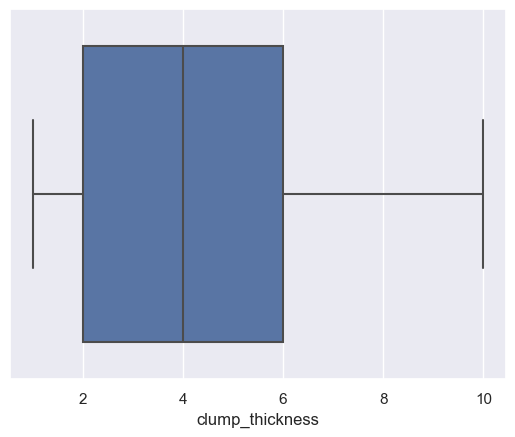

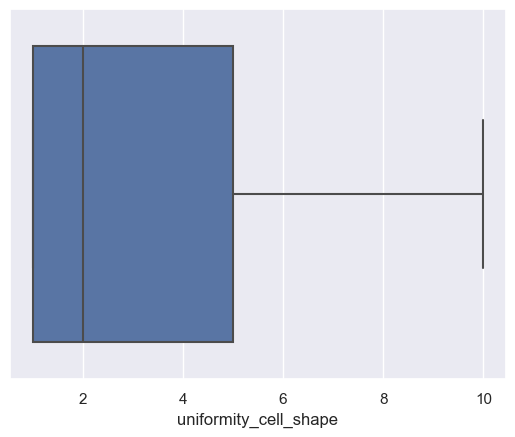

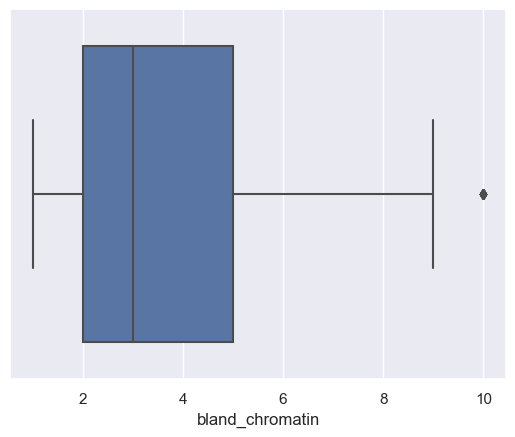

Distribution Analysis - Histogram


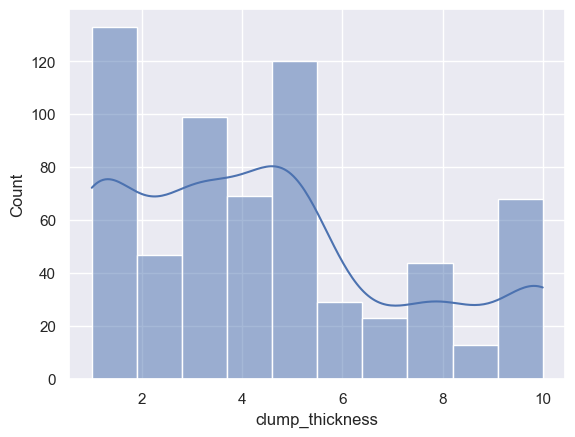

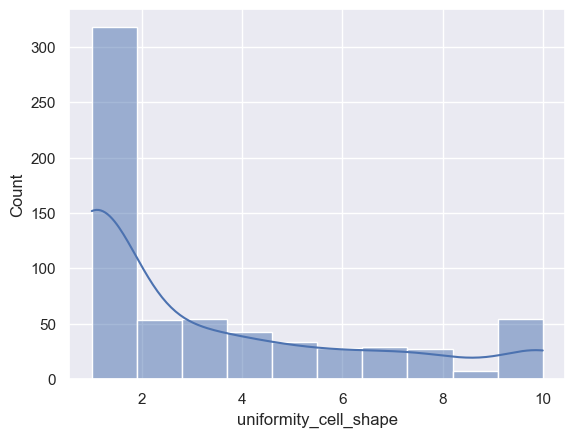

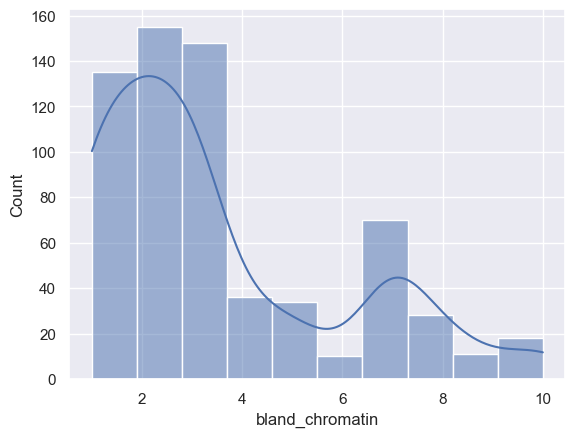

In [19]:
eda_num(data)

In [20]:
eda_num(data, method='correlation')

Correlation Analysis - Heatmap


c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_numeric.py:28: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,clump_thickness,uniformity_cell_shape,bland_chromatin
clump_thickness,1.00,0.66,0.56
uniformity_cell_shape,0.66,1.00,0.74
bland_chromatin,0.56,0.74,1.00


Bar Plot of class


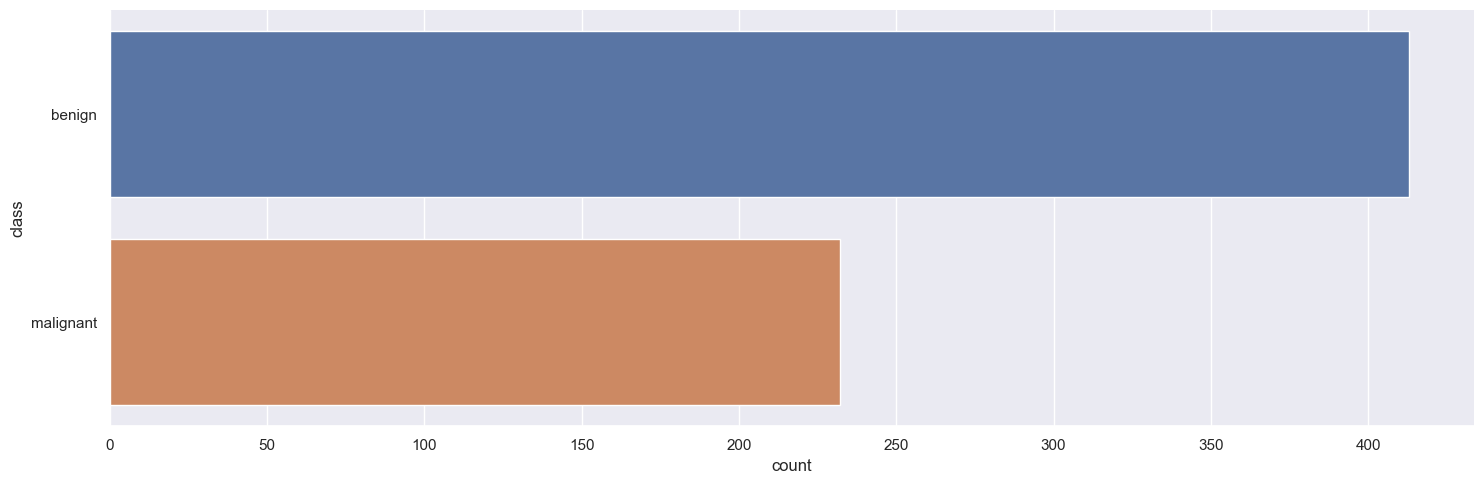

Summary of class


,count,relative_pct
benign,413,0.64
malignant,232,0.36


In [21]:
eda_cat(data, x='class')

Feature Importance in the prediction of class


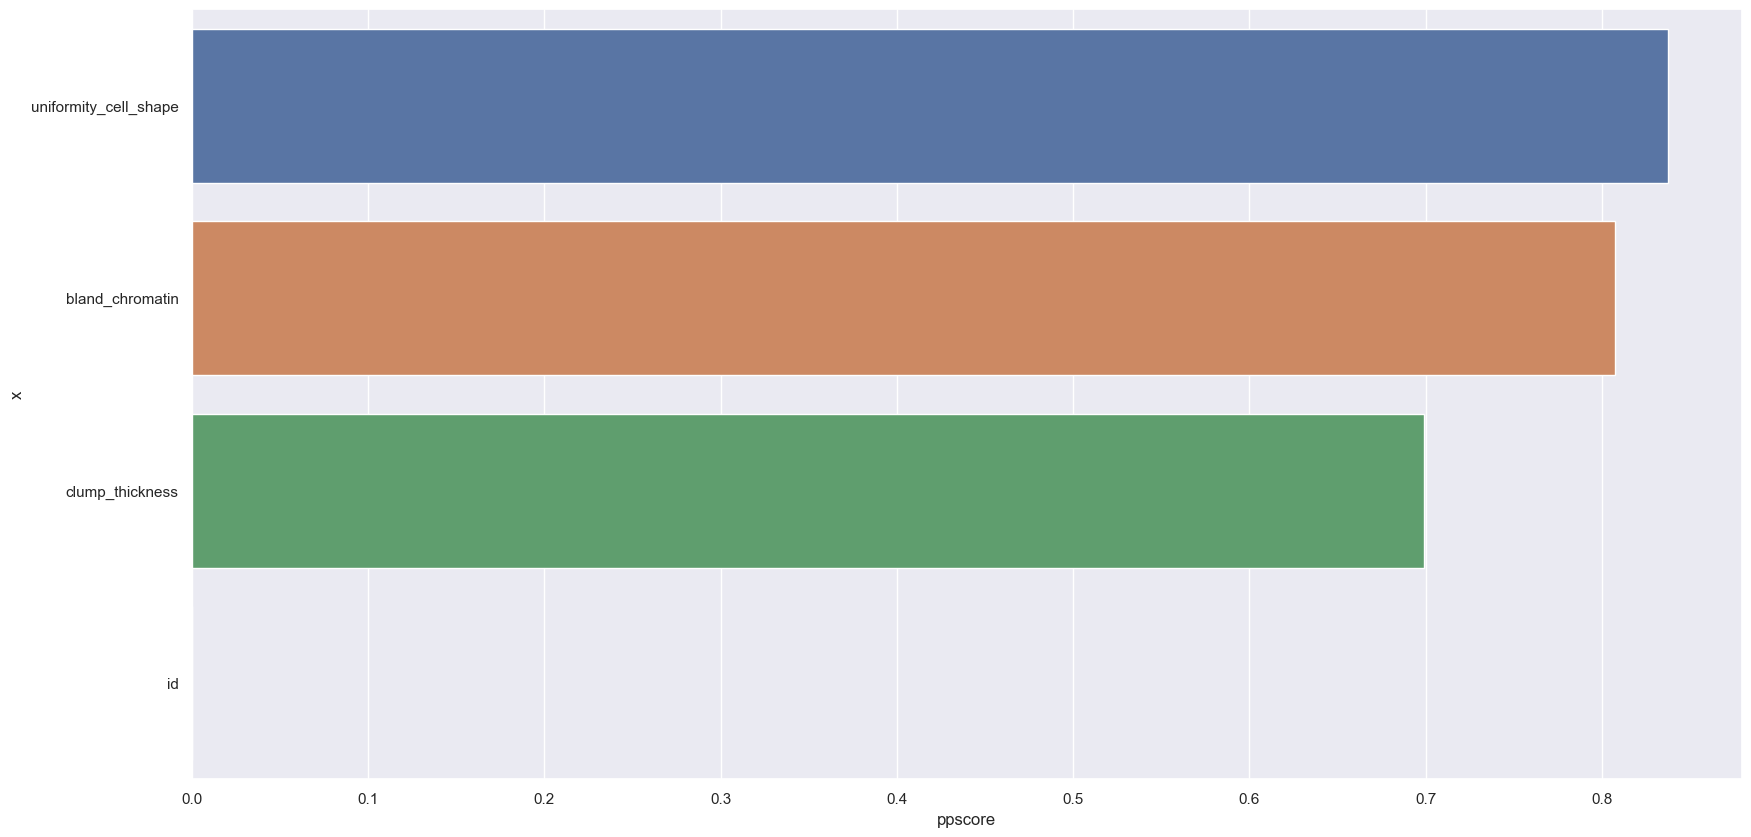

In [22]:
eda_numcat(data, x='class')

<AxesSubplot: xlabel='uniformity_cell_shape', ylabel='count'>

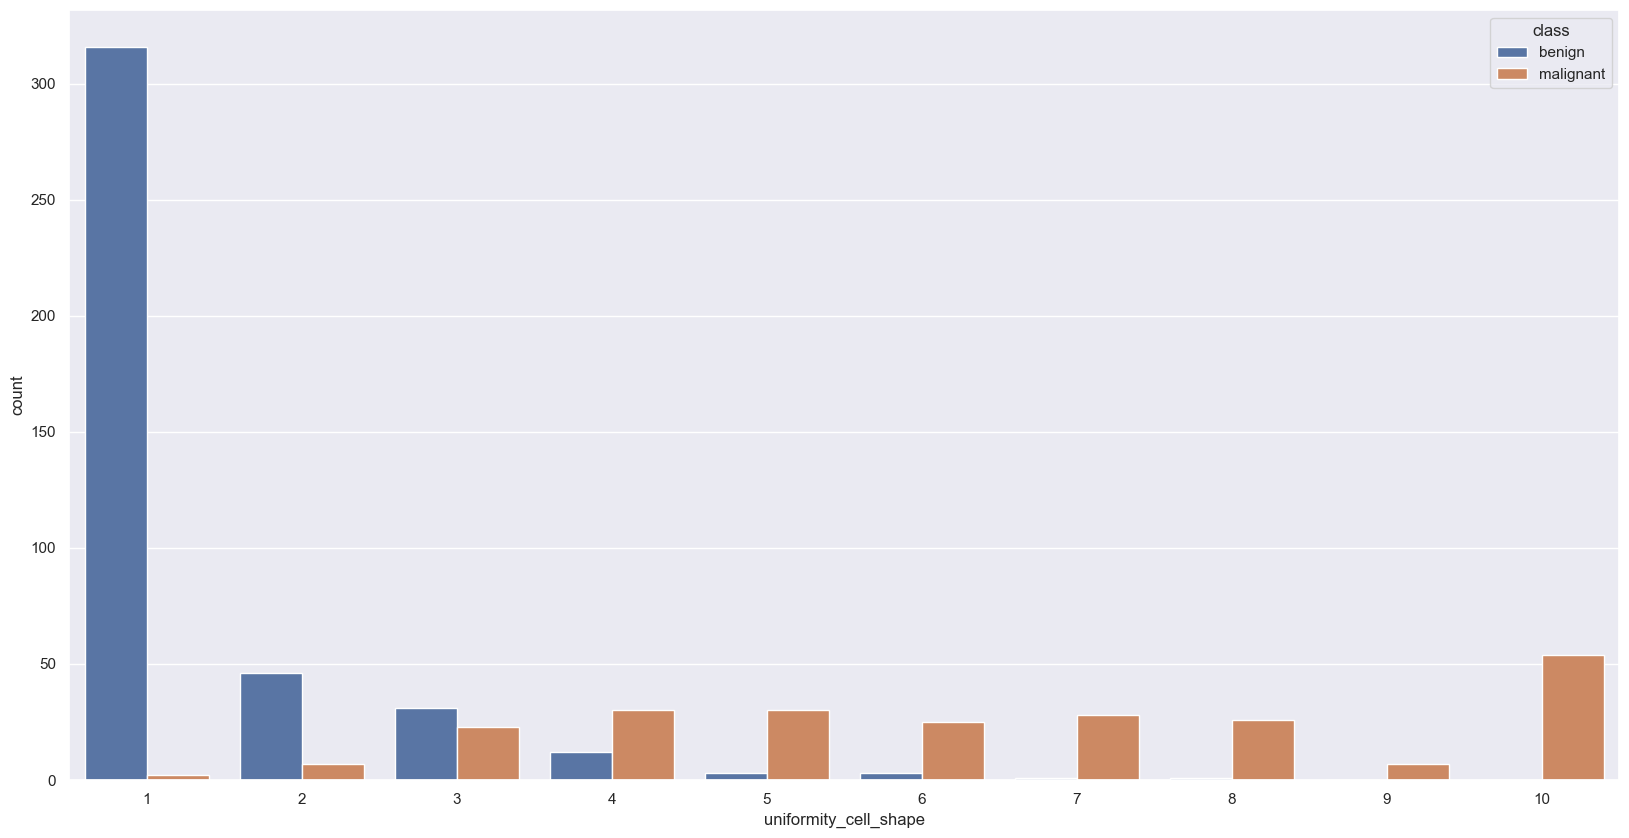

In [23]:
#Que efectos tendra la uniformidad de la forma de la celula en que un tumor sea maligno o benigno?

sns.countplot(data=data, x='uniformity_cell_shape', hue='class')
#Nota: En esta grafica se uede observar que mientras mayor sea el valor de tamaño de la celula, mayor
# podria ser la posibilidad de que el tumor sea maligno, como se puede observar desde los valores 4 hasta el 10.


<AxesSubplot: xlabel='bland_chromatin', ylabel='count'>

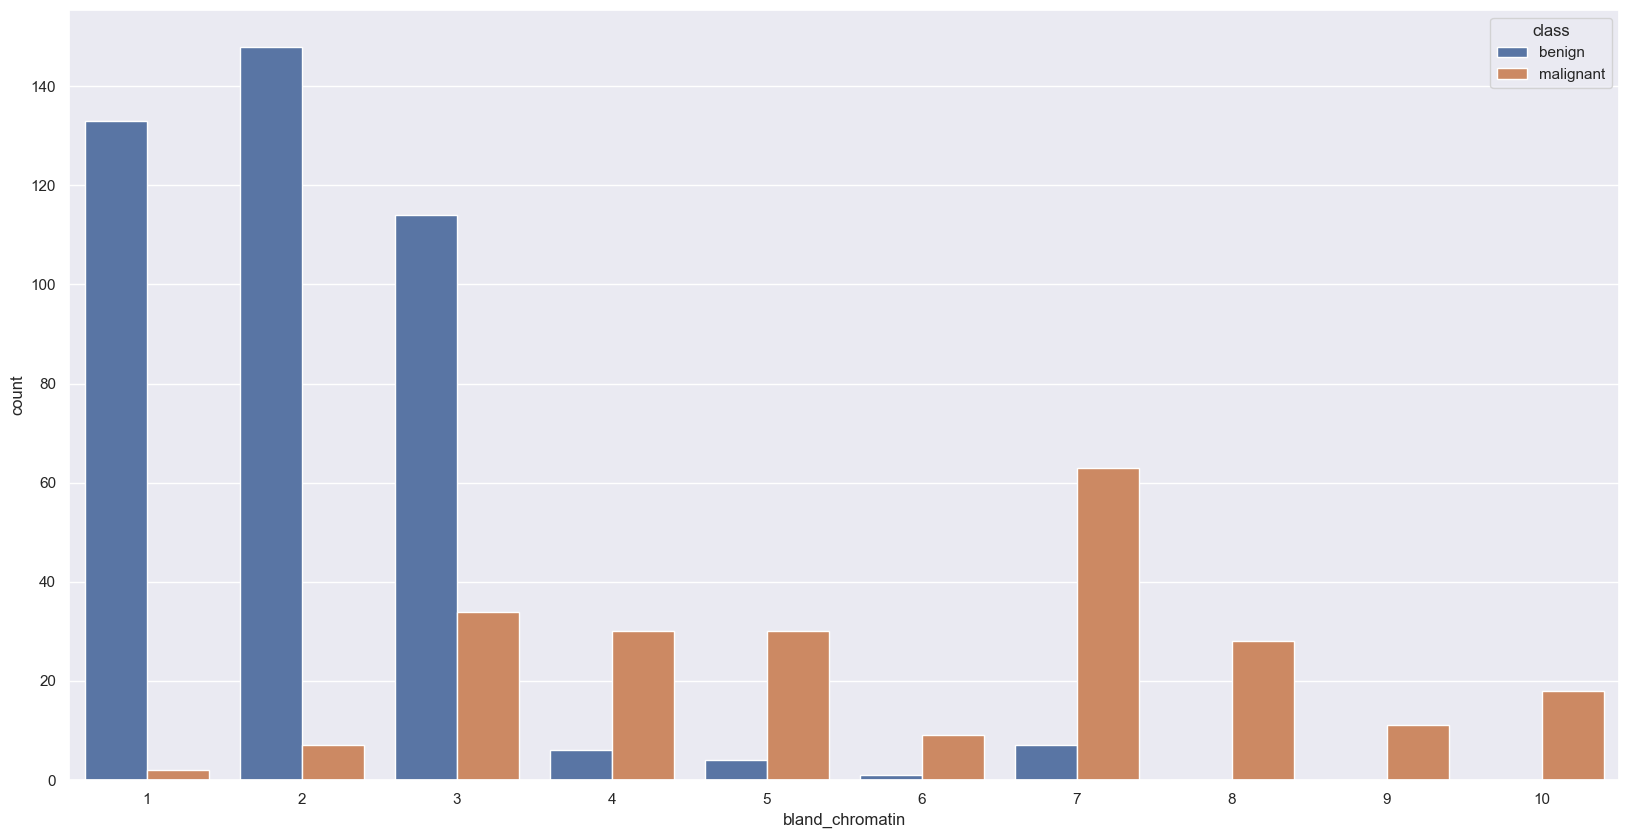

In [24]:
# Tendra algun efecto los valores de cromatina blanda en la clase de tumor?
sns.countplot(data=data, x='bland_chromatin', hue='class')

# Nota: Se puede notar segun la grafica que a partir del valor de cromatina blanda 4 para arriba
# se presenta una cantidad bastante considerable de casos maligno, lo que, a la hora de realizar
# el modelo se deberia de tomar en cuenta debido a que es un valor que segun lo observado
# se correlaciona mucho con el tipo de clase de tumor que es.

# Importante tomar en cuenta en el modelo !!!

<AxesSubplot: xlabel='clump_thickness', ylabel='count'>

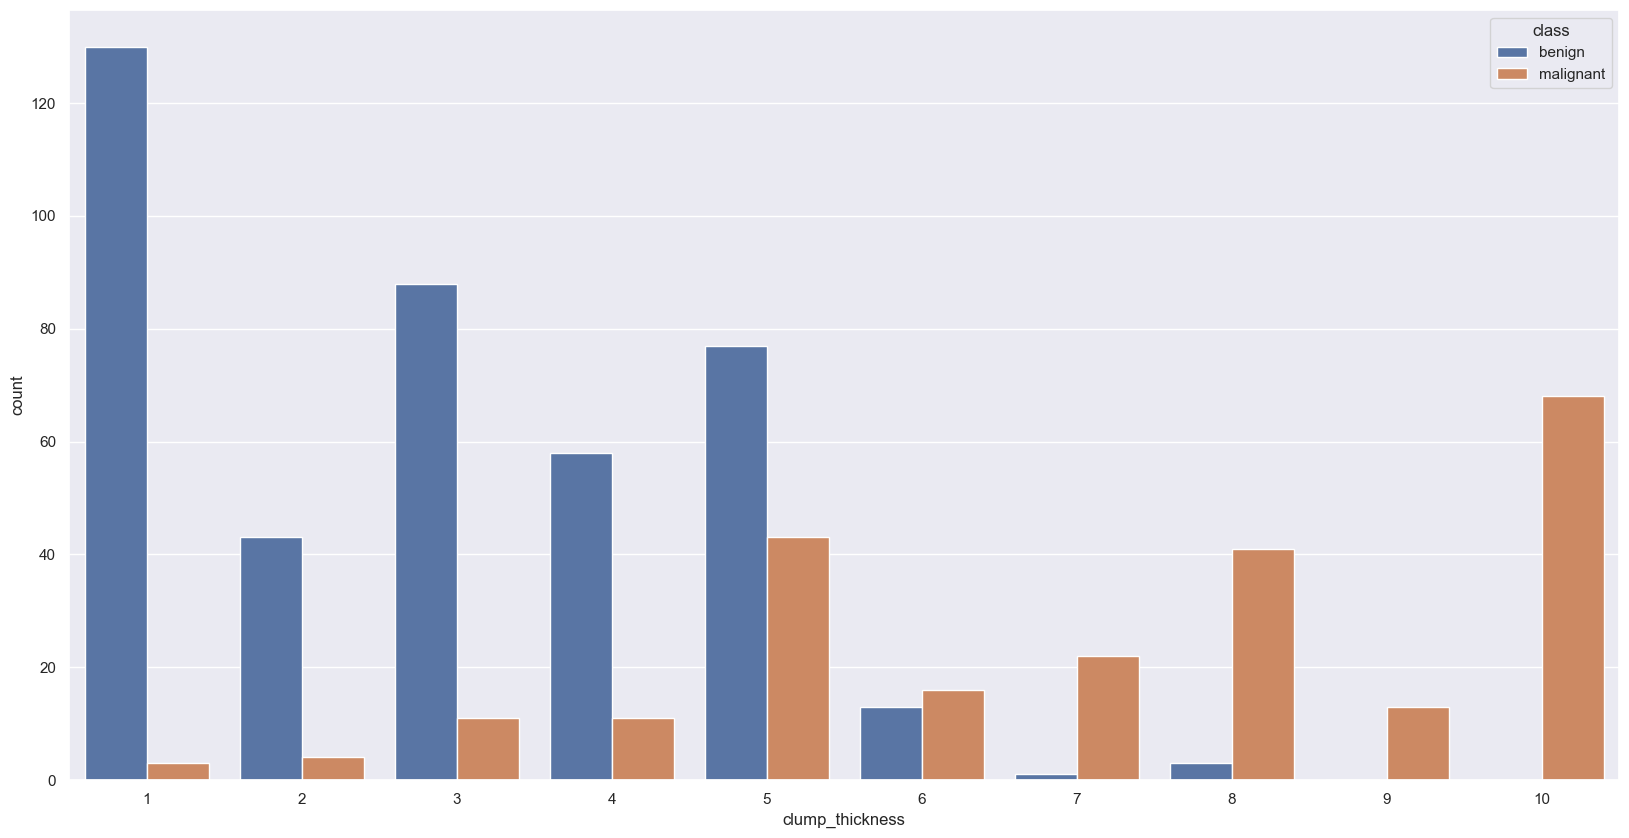

In [25]:
# Puede el valor de clump thickness afectar al valor class?

sns.countplot(data=data, x='clump_thickness', hue='class')

# Nota: En efecto afecta mucho los valores de ambos tipos de categorias, beningnos y malignos
# por lo que nos podria ayudar mucho a entrenar el modelo para obtener una prediccion mas acertada.

# Importante tomar en cuenta !!!

A partir de lo observado se encuentra que cada uno de los valores al ser muy elevados pueden significar casi automaticamente que el tumor vaya a ser maligno, ya que en la mayoria de las variables, al pasar cierto valor solo se encuentran casos de tumores malignos, sin embargo, para simplificacion del modelo, se podrian limpiar las variables con alta correlacion entre si o que en si tienen poca correlacion con si el tumor es benigno o maligno.

- La uniformidad en el tamaño de la celula y uniformidad en la forma de la celula se puede obviar en una sola variable debido a que tienen una correlacion bastante alta.
- La adhesion marginal se podria obviar debido a que tiene poca influencia en cuanto a la clase del tumor se refiere.
- El tamaño epilethial tambien se puede obviar debido a la poca influencia sobre la clase del tumor.
- Bare_nuclei y normal_nucleoli tambien al tener poca correlacion entre otros valores y encima tener poca correlacion con la clase de tumor se obviaran.

## Desarrollo de modelo de clasificacion

### Regresion Logistica

In [26]:

X = data.iloc[:, 1:-1].values #Valores: clump_thickness, uniformity_cell_shape bland_chromatin
y = data.iloc[:, -1].values #Class (Benigno o Maligno)

print(X)
print(y)

[[ 5  1  3]
 [ 5  4  3]
 [ 3  1  3]
 ...
 [ 2  1  1]
 [ 5 10  8]
 [ 4  6 10]]
['benign', 'benign', 'benign', 'benign', 'benign', ..., 'benign', 'benign', 'benign', 'malignant', 'malignant']
Length: 645
Categories (2, object): ['benign', 'malignant']


In [27]:
data

,id,clump_thickness,uniformity_cell_shape,bland_chromatin,class
0,1000025,5,1,3,benign
1,1002945,5,4,3,benign
2,1015425,3,1,3,benign
3,1016277,6,8,3,benign
4,1017023,4,1,3,benign
...,...,...,...,...,...
693,763235,3,1,2,benign
694,776715,3,1,1,benign
695,841769,2,1,1,benign
696,888820,5,10,8,malignant


In [28]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
print(X_entreno)

[[5 6 8]
 [1 1 5]
 [5 2 1]
 ...
 [3 1 2]
 [2 1 1]
 [1 1 2]]


In [30]:
print(y_entreno)

['malignant', 'benign', 'benign', 'benign', 'benign', ..., 'benign', 'malignant', 'benign', 'benign', 'benign']
Length: 483
Categories (2, object): ['benign', 'malignant']


In [31]:
print(X_prueba)

[[ 5  1  2]
 [ 7 10  9]
 [ 8  7  3]
 [ 7  4  5]
 [ 7  5  3]
 [ 3  1  1]
 [ 1  2  1]
 [ 8  4  3]
 [ 4  1  2]
 [ 4  1  3]
 [ 3  1  2]
 [ 1  3  2]
 [ 4  1  3]
 [10 10  8]
 [ 5  1  3]
 [ 6  7  8]
 [ 8  6  6]
 [ 2  1  1]
 [ 8 10  3]
 [ 8 10  8]
 [10  5  7]
 [ 3  7  7]
 [ 3  1  3]
 [ 3  1  1]
 [ 5  1  2]
 [ 5  1  1]
 [ 3  4  1]
 [ 1  1  3]
 [ 1  1  3]
 [ 5  1  1]
 [10  6  4]
 [10  8 10]
 [ 3  1  2]
 [ 5 10 10]
 [ 3  2  3]
 [ 5  1  2]
 [10  8  8]
 [ 2  1  1]
 [ 3  1  2]
 [ 1  1  3]
 [ 4  6 10]
 [ 4  1  2]
 [ 5  6  4]
 [ 5  6  8]
 [ 3  1  2]
 [ 1  1  3]
 [ 3  1  1]
 [ 5  1  1]
 [ 1  1  1]
 [ 4  2  2]
 [ 9  8  2]
 [ 1  1  1]
 [10  7  3]
 [ 2  1  2]
 [10  5  3]
 [ 1  1  1]
 [ 7  6  4]
 [ 4  1  3]
 [ 6  1  3]
 [10  5  8]
 [ 3  1  3]
 [ 8  4  5]
 [ 5  3  3]
 [ 1  1  2]
 [10  4  5]
 [ 1  3  3]
 [10 10 10]
 [10  8  5]
 [ 1  1  3]
 [10  7  4]
 [ 6  3  6]
 [ 3  5  7]
 [ 2  1  1]
 [ 5  1  3]
 [ 3  1  1]
 [ 2  1  2]
 [ 5  1  1]
 [ 1  1  1]
 [ 7  8  7]
 [ 4  1  3]
 [ 4  1  3]
 [ 5  1  3]
 [ 3  1  1]
 [ 8

In [32]:
print(y_prueba)

['benign', 'malignant', 'malignant', 'malignant', 'malignant', ..., 'malignant', 'malignant', 'benign', 'benign', 'benign']
Length: 162
Categories (2, object): ['benign', 'malignant']


#### Escalamiento / Normalizacion

In [33]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
X_entreno = normalizador.fit_transform(X_entreno)
X_prueba = normalizador.transform(X_prueba)

In [34]:
print(X_entreno)

[[ 0.19999773  0.89986194  1.82166079]
 [-1.20507721 -0.77180467  0.59736279]
 [ 0.19999773 -0.43747134 -1.03503454]
 ...
 [-0.50253974 -0.77180467 -0.62693521]
 [-0.85380847 -0.77180467 -1.03503454]
 [-1.20507721 -0.77180467 -0.62693521]]


In [35]:
print(X_prueba)

[[ 0.19999773 -0.77180467 -0.62693521]
 [ 0.90253519  2.23719523  2.22976012]
 [ 1.25380392  1.23419526 -0.21883587]
 [ 0.90253519  0.2311953   0.59736279]
 [ 0.90253519  0.56552862 -0.21883587]
 [-0.50253974 -0.77180467 -1.03503454]
 [-1.20507721 -0.43747134 -1.03503454]
 [ 1.25380392  0.2311953  -0.21883587]
 [-0.15127101 -0.77180467 -0.62693521]
 [-0.15127101 -0.77180467 -0.21883587]
 [-0.50253974 -0.77180467 -0.62693521]
 [-1.20507721 -0.10313802 -0.62693521]
 [-0.15127101 -0.77180467 -0.21883587]
 [ 1.95634139  2.23719523  1.82166079]
 [ 0.19999773 -0.77180467 -0.21883587]
 [ 0.55126646  1.23419526  1.82166079]
 [ 1.25380392  0.89986194  1.00546212]
 [-0.85380847 -0.77180467 -1.03503454]
 [ 1.25380392  2.23719523 -0.21883587]
 [ 1.25380392  2.23719523  1.82166079]
 [ 1.95634139  0.56552862  1.41356146]
 [-0.50253974  1.23419526  1.41356146]
 [-0.50253974 -0.77180467 -0.21883587]
 [-0.50253974 -0.77180467 -1.03503454]
 [ 0.19999773 -0.77180467 -0.62693521]
 [ 0.19999773 -0.77180467

#### Entrenamiento del modelo de regresion logistica

In [36]:
from sklearn.linear_model import LogisticRegression
clasificador = LogisticRegression(random_state = 0)
clasificador.fit(X_entreno, y_entreno)

LogisticRegression(random_state=0)

In [37]:
print(clasificador.predict(normalizador.transform([[5,1,3]])))
#Valores: clump_thickness, uniformity_cell_shape bland_chromatin

['benign']


#### Prediccion de los resultados del conjunto de datos de prueba

In [38]:
y_pred = clasificador.predict(X_prueba)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_prueba.reshape(len(y_prueba),1)),1))

[['benign' 'benign']
 ['malignant' 'malignant']
 ['malignant' 'malignant']
 ['malignant' 'malignant']
 ['malignant' 'malignant']
 ['benign' 'benign']
 ['benign' 'benign']
 ['malignant' 'malignant']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['malignant' 'malignant']
 ['benign' 'benign']
 ['malignant' 'malignant']
 ['malignant' 'malignant']
 ['benign' 'benign']
 ['malignant' 'malignant']
 ['malignant' 'malignant']
 ['malignant' 'malignant']
 ['malignant' 'malignant']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['malignant' 'malignant']
 ['malignant' 'malignant']
 ['benign' 'benign']
 ['malignant' 'malignant']
 ['benign' 'benign']
 ['benign' 'benign']
 ['malignant' 'malignant']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['malignant' 'malignant']
 ['benign' 'benign']
 ['malignant' 'm

#### Matriz de confusion

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
matconf = confusion_matrix(y_prueba, y_pred)
print(matconf)
accuracy_score(y_prueba, y_pred)

[[107   2]
 [  1  52]]


0.9814814814814815

### Regresion K-NN

In [50]:
data.head()
print(data)

          id  clump_thickness  uniformity_cell_shape  bland_chromatin  \
0    1000025                5                      1                3   
1    1002945                5                      4                3   
2    1015425                3                      1                3   
3    1016277                6                      8                3   
4    1017023                4                      1                3   
..       ...              ...                    ...              ...   
693   763235                3                      1                2   
694   776715                3                      1                1   
695   841769                2                      1                1   
696   888820                5                     10                8   
697   897471                4                      6               10   

         class  
0       benign  
1       benign  
2       benign  
3       benign  
4       benign  
..         ...  
693 

#### Estandarizar las Variables

In [60]:
escalador = StandardScaler()
escalador.fit(data.drop(['id', 'class'], axis=1))
cols_std = escalador.transform(data.drop(['id', 'class'], axis=1))
datos_std = pd.DataFrame(cols_std, columns=data.columns[1:-1])
datos_std.head()

,clump_thickness,uniformity_cell_shape,bland_chromatin
0,0.185119,-0.760791,-0.202515
1,0.185119,0.244763,-0.202515
2,-0.515186,-0.760791,-0.202515
3,0.535272,1.585500,-0.202515
4,-0.165033,-0.760791,-0.202515


#### Train Test Split

In [65]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(cols_std, data['class'],
                                                    test_size = 0.30, random_state = 0)

#### Utilizacion del KNN

In [70]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_entreno, y_entreno)
pred = knn.predict(X_prueba)
print(pred)

['benign' 'malignant' 'malignant' 'malignant' 'malignant' 'benign'
 'benign' 'malignant' 'benign' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'malignant' 'malignant' 'benign' 'malignant'
 'malignant' 'malignant' 'malignant' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'benign' 'malignant' 'malignant' 'benign'
 'malignant' 'benign' 'benign' 'malignant' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'benign' 'malignant' 'benign'
 'malignant' 'benign' 'benign' 'benign' 'benign' 'malignant' 'benign'
 'malignant' 'benign' 'benign' 'malignant' 'benign' 'malignant'
 'malignant' 'benign' 'malignant' 'malignant' 'malignant' 'benign'
 'benign' 'benign' 'benign' 'benign' 'benign' 'malignant' 'benign'
 'benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'benign' 'benign' 'benign' 'malignant' 'benign'
 'benign' 'benign' 'benign' 'malignant' '

#### Predicciones y Evaluaciones

In [73]:
print(confusion_matrix(y_prueba, pred))


[[126   3]
 [  6  59]]


In [74]:
print(classification_report(y_prueba, pred))

              precision    recall  f1-score   support

      benign       0.95      0.98      0.97       129
   malignant       0.95      0.91      0.93        65

    accuracy                           0.95       194
   macro avg       0.95      0.94      0.95       194
weighted avg       0.95      0.95      0.95       194



#### Seleccion de un valor K

In [77]:
tasa_error = []

# Puede tardar un poco
for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_entreno, y_entreno)
    pred_i = knn.predict(X_prueba)
    tasa_error.append(np.mean(pred_i != y_prueba))

Text(0, 0.5, 'Tasa de Error')

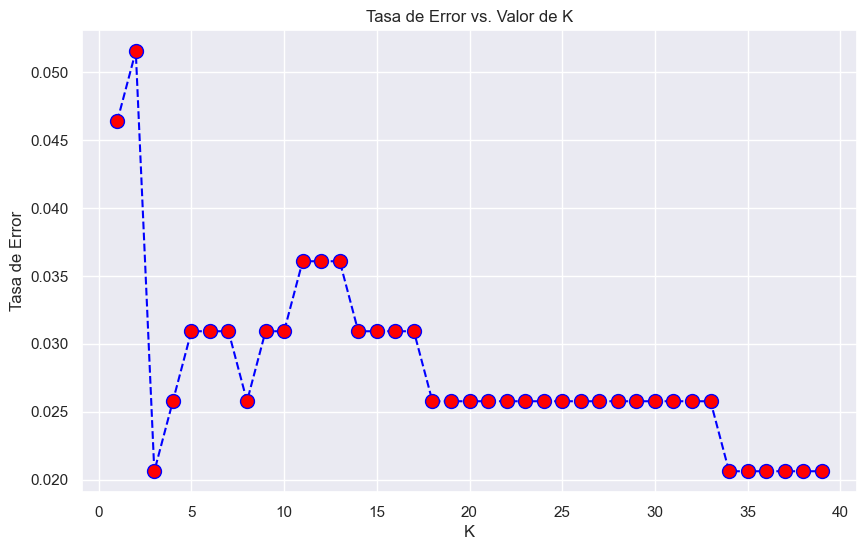

In [78]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), tasa_error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

In [79]:
# PRIMERO UNA RAPIDA COMPARACION CON NUESTRO VALOR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_entreno,y_entreno)
pred = knn.predict(X_prueba)

print('CON K = 1')
print()
print('Matriz de Confusión\n')
print(confusion_matrix(y_prueba,pred))
print('\n')
print(classification_report(y_prueba,pred))

CON K = 1

Matriz de Confusión

[[126   3]
 [  6  59]]


              precision    recall  f1-score   support

      benign       0.95      0.98      0.97       129
   malignant       0.95      0.91      0.93        65

    accuracy                           0.95       194
   macro avg       0.95      0.94      0.95       194
weighted avg       0.95      0.95      0.95       194



In [90]:
# AHORA CON K = 5
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_entreno, y_entreno)
pred = knn.predict(X_prueba)

print('CON K = 5')
print()
print('Matriz de Confusión\n')
print(confusion_matrix(y_prueba,pred))
print('\n')
print(classification_report(y_prueba,pred))

CON K = 5

Matriz de Confusión

[[126   3]
 [  3  62]]


              precision    recall  f1-score   support

      benign       0.98      0.98      0.98       129
   malignant       0.95      0.95      0.95        65

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194

